<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Lab - 6</b></center>    
<pre>


# Dimensionality Reduction using NumPy




## 🔍 What is Data Reduction?

Data reduction refers to the process of reducing the amount of data that needs to be processed and stored, while preserving the essential patterns in the data.

### Why do we reduce data?
- To reduce computational cost.
- To remove noise and redundant features.
- To improve model performance and training time.
- To visualize high-dimensional data in 2D or 3D.

Common data reduction techniques include:
- Principal Component Analysis (PCA)
- Feature selection
- Sampling



## 📉 What is Principal Component Analysis (PCA)?

PCA is a **dimensionality reduction technique** that transforms a dataset into a new coordinate system. It identifies the **directions (principal components)** where the variance of the data is maximized.

### Key Concepts:
- **Principal Components**: New features (linear combinations of original features) capturing most variance.
- **Eigenvectors & Eigenvalues**: Used to compute these principal directions.
- **Covariance Matrix**: Measures how features vary with each other.

PCA helps in **visualizing high-dimensional data**, **noise reduction**, and **speeding up algorithms**.



## 🧠 NumPy Functions Summary for PCA

| Function | Purpose |
|---------|---------|
| `np.mean(X, axis=0)` | Compute mean of each column (feature-wise mean). |
| `X - np.mean(X, axis=0)` | Centering the data (zero mean). |
| `np.cov(X, rowvar=False)` | Compute covariance matrix for features. |
| `np.linalg.eigh(cov_mat)` | Get eigenvalues and eigenvectors (for symmetric matrices). |
| `np.argsort(values)[::-1]` | Sort values in descending order. |
| `np.dot(X, eigenvectors)` | Project original data onto new axes. |


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Step 1: Load the Iris Dataset

In [7]:
X = iris.drop(columns='species')
y = iris['species'].map({
    'setosa': 0,
    'virginica': 1,
    'versicolor': 2
})
print('Dimension of iris', X.shape)

Dimension of iris (150, 4)


# Step 2: Standardize the data (zero mean)

In [8]:
X_meaned = X - np.mean(X, axis=0) # axis=0 means finds column wise mean and subtract from x of that particular column
print('Data after centering (first 5 rows):\n', X_meaned[:5])
print(X_meaned.shape)

Data after centering (first 5 rows):
    sepal_length  sepal_width  petal_length  petal_width
0     -0.743333     0.442667        -2.358    -0.999333
1     -0.943333    -0.057333        -2.358    -0.999333
2     -1.143333     0.142667        -2.458    -0.999333
3     -1.243333     0.042667        -2.258    -0.999333
4     -0.843333     0.542667        -2.358    -0.999333
(150, 4)


# Step 3: Compute the Covariance Matrix

In [9]:
cov_mat = np.cov(X_meaned, rowvar=False) # rowvar=True means if finds covariance matrix between two rows i.e row wise. but we want column wise
print('Covariance matrix shape:', cov_mat.shape)
print(cov_mat)

Covariance matrix shape: (4, 4)
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


# Step 4: Compute eigenvalues and eigenvectors

In [10]:
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

print('EigenValues:\n', eigen_values)
print('EigenVectors (first 2):\n', eigen_vectors)

EigenValues:
 [0.02383509 0.0782095  0.24267075 4.22824171]
EigenVectors (first 2):
 [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


# Step 5: Sort eigenvalues and eigenvectors

In [12]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
print('sort index', sorted_index)
print('sort eigen_value', sorted_eigenvalues)
print('sort eigen_vector', sorted_eigenvectors)

sort index [3 2 1 0]
sort eigen_value [4.22824171 0.24267075 0.0782095  0.02383509]
sort eigen_vector [[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


# Step 6: Select the top k eigenvectors (top 2)

In [13]:
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]
print(eigenvector_subset.shape)

(4, 2)


# Step 7: Project the data onto the top k eigenvectors

In [14]:
X_reduced = np.dot(X_meaned, eigenvector_subset)
print('Reduced data shape:', X_reduced.shape)

Reduced data shape: (150, 2)


# Step 8: Plot the PCA-Reduced Data

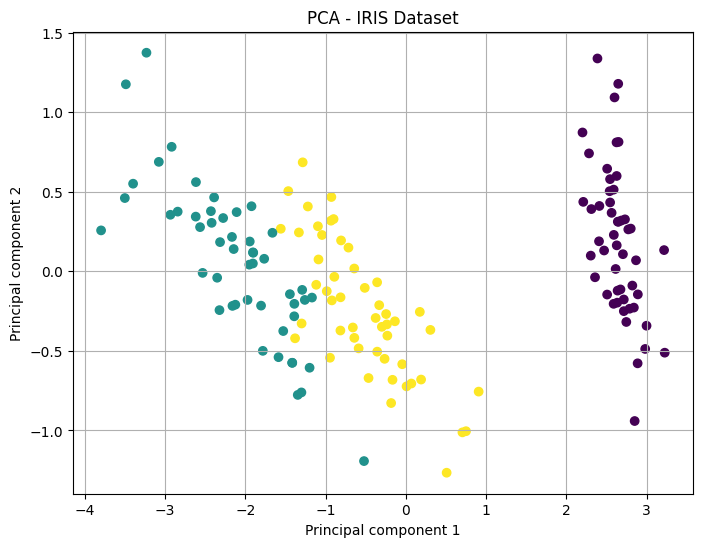

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA - IRIS Dataset')
plt.grid()
plt.show()

# Extra - Bining Method

# 5,10,11,13,15,35,50,55,72,92,204,215.
Partition them into three bins by each of the following methods:
(a) equal-frequency (equal-depth) partitioning
(b) equal-width partitioning

In [20]:
data = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

def equal_frequency_binning(data, bins):
    df = pd.DataFrame({'values': sorted(data)})
    df['bin'] = pd.qcut(df['values'], q=bins, labels=[f'Bin {i+1}' for i in range(bins)])
    return df.groupby('bin')['values'].apply(list)

def equal_width_binning(data, bins):
    df = pd.DataFrame({'values': sorted(data)})
    df['bin'] = pd.cut(df['values'], bins=bins, labels=[f'Bin {i+1}' for i in range(bins)])
    return df.groupby('bin')['values'].apply(list)

freq_bins = equal_frequency_binning(data, 3)
width_bins = equal_width_binning(data, 3)

print("Equal-Frequency Binning:")
print(freq_bins)
print("\nEqual-Width Binning:")
print(width_bins)

Equal-Frequency Binning:
bin
Bin 1       [5, 10, 11, 13]
Bin 2      [15, 35, 50, 55]
Bin 3    [72, 92, 204, 215]
Name: values, dtype: object

Equal-Width Binning:
bin
Bin 1    [5, 10, 11, 13, 15, 35, 50, 55, 72]
Bin 2                                   [92]
Bin 3                             [204, 215]
Name: values, dtype: object


C:\Users\dhair\AppData\Local\Temp\ipykernel_17216\3052761515.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('bin')['values'].apply(list)
C:\Users\dhair\AppData\Local\Temp\ipykernel_17216\3052761515.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('bin')['values'].apply(list)
